In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [3]:
dfo = pd.read_csv('../data/P87-S8-Time-Series-Resources/all_stocks_5yr.csv', parse_dates=['date'])
dfo.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [4]:
dfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


In [5]:
dfo.dropna(inplace=True)

In [6]:
df = dfo.set_index(['date','Name'])
df.sort_index(inplace=True)
df.head()

open     high      low    close     volume
date       Name                                               
2013-02-08 A     45.0700  45.3500  45.0000  45.0800    1824755
           AAL   15.0700  15.1200  14.6300  14.7500    8407500
           AAP   78.3400  79.7200  78.0100  78.9000    1298137
           AAPL  67.7142  68.4014  66.8928  67.8542  158168416
           ABBV  36.3700  36.4200  35.8250  36.2500   13858795

<Axes: xlabel='date,Name'>

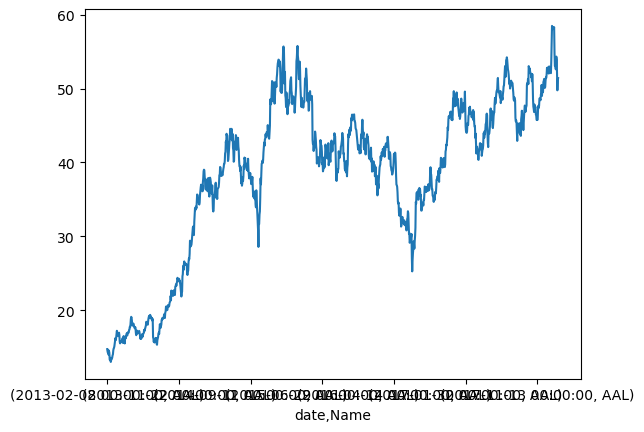

In [7]:
df.loc[(slice(None), "AAL"),:].close.plot()

In [26]:
aal_close= df.loc[(slice(None), "AAL"),:].close
aal_close.head(2)

date        Name
2013-02-08  AAL     14.75
2013-02-11  AAL     14.46
Name: close, dtype: float64

In [28]:
aal_close = aal_close.reset_index()
aal_close

,index,date,Name,close
0,0,2013-02-08,AAL,14.75
1,1,2013-02-11,AAL,14.46
2,2,2013-02-12,AAL,14.27
3,3,2013-02-13,AAL,14.66
4,4,2013-02-14,AAL,13.99
...,...,...,...,...
1254,1254,2018-02-01,AAL,53.88
1255,1255,2018-02-02,AAL,52.10
1256,1256,2018-02-05,AAL,49.76
1257,1257,2018-02-06,AAL,51.18


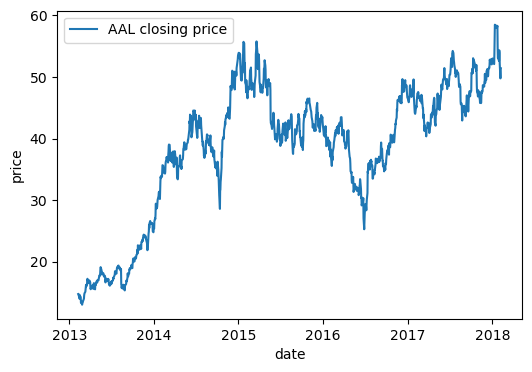

In [34]:
plt.figure(figsize=(6,4))
plt.plot(aal_close.date, aal_close.close, label="AAL closing price")
plt.xlabel('date')
plt.ylabel('price')
plt.legend();

In [101]:
idx = pd.IndexSlice
df2 = df.loc[idx[:, 'A':'AB'], :]

In [102]:
idx = pd.IndexSlice
aal = df.loc[idx[:, "AAL"],:]

In [103]:
idx = pd.IndexSlice
aal.loc[idx['2017':'2017-03',:],:]

,,open,high,low,close,volume
date,Name,,,,,
2017-01-03,AAL,47.28,47.340,46.1350,46.30,6737752
2017-01-04,AAL,46.63,47.435,46.3500,46.70,5859604
2017-01-05,AAL,46.52,46.930,45.6100,45.89,6825316
2017-01-06,AAL,45.85,46.720,45.4700,46.21,7260197
2017-01-09,AAL,46.01,47.340,45.7800,47.08,4739142
...,...,...,...,...,...,...
2017-03-27,AAL,41.07,41.890,40.5600,41.74,6050846
2017-03-28,AAL,41.83,42.930,41.5500,42.60,6185811
2017-03-29,AAL,42.69,42.760,41.8700,41.96,5331362


In [104]:
aal = aal.reset_index().drop(columns="Name", axis=1).set_index("date")
aal.head()

,open,high,low,close,volume
date,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500
2013-02-11,14.89,15.01,14.26,14.46,8882000
2013-02-12,14.45,14.51,14.10,14.27,8126000
2013-02-13,14.30,14.94,14.25,14.66,10259500
2013-02-14,14.94,14.96,13.16,13.99,31879900


In [105]:
start , end = aal.index.min(), aal.index.max()
print(start, end)

2013-02-08 00:00:00 2018-02-07 00:00:00


In [98]:
new_index = pd.date_range(start, end)
new_index

DatetimeIndex(['2013-02-08', '2013-02-09', '2013-02-10', '2013-02-11',
               '2013-02-12', '2013-02-13', '2013-02-14', '2013-02-15',
               '2013-02-16', '2013-02-17',
               ...
               '2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01',
               '2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05',
               '2018-02-06', '2018-02-07'],
              dtype='datetime64[ns]', length=1826, freq='D')

In [110]:
aal2 = aal.reindex(new_index, method="ffill")
aal2

,open,high,low,close,volume
2013-02-08,15.07,15.12,14.63,14.75,8407500
2013-02-09,15.07,15.12,14.63,14.75,8407500
2013-02-10,15.07,15.12,14.63,14.75,8407500
2013-02-11,14.89,15.01,14.26,14.46,8882000
2013-02-12,14.45,14.51,14.10,14.27,8126000
...,...,...,...,...,...
2018-02-03,53.49,53.99,52.03,52.10,5109361
2018-02-04,53.49,53.99,52.03,52.10,5109361
2018-02-05,51.99,52.39,49.75,49.76,6878284
2018-02-06,49.32,51.50,48.79,51.18,6782480


In [113]:
aal.resample(rule="A").mean()

,open,high,low,close,volume
date,,,,,
2013-12-31,18.614336,18.920291,18.308745,18.601549,8.201441e+06
2014-12-31,38.861944,39.549713,38.229872,38.923550,1.239803e+07
2015-12-31,45.184325,45.835482,44.447715,45.121607,1.155447e+07
2016-12-31,38.154365,38.722188,37.607546,38.183829,9.166420e+06
2017-12-31,47.499935,48.063533,46.932376,47.490717,5.871768e+06
2018-12-31,54.221154,55.001877,53.568481,54.280000,5.734882e+06


In [114]:
aal.resample(rule="AS").mean()

,open,high,low,close,volume
date,,,,,
2013-01-01,18.614336,18.920291,18.308745,18.601549,8.201441e+06
2014-01-01,38.861944,39.549713,38.229872,38.923550,1.239803e+07
2015-01-01,45.184325,45.835482,44.447715,45.121607,1.155447e+07
2016-01-01,38.154365,38.722188,37.607546,38.183829,9.166420e+06
2017-01-01,47.499935,48.063533,46.932376,47.490717,5.871768e+06
2018-01-01,54.221154,55.001877,53.568481,54.280000,5.734882e+06
